In [0]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [14]:
train_imgs=mnist.train.images
train_labels=mnist.train.labels

test_imgs=mnist.test.images
test_labels=mnist.test.labels

print(train_imgs.shape)

(55000, 784)


In [0]:
def generator(y,c):
  hidden=tf.layers.dense(inputs=tf.concat([y,c],axis=1),units=256,activation=tf.nn.relu,kernel_initializer=tf.initializers.glorot_normal())
  generate=tf.layers.dense(inputs=hidden,units=28*28,activation=tf.nn.sigmoid,kernel_initializer=tf.initializers.glorot_normal())
  return generate

In [0]:
def discriminator(x,c,reuse=False):
  hidden=tf.layers.dense(inputs=tf.concat([x,c],axis=1),units=256,activation=tf.nn.relu,kernel_initializer=tf.initializers.glorot_normal(),reuse=reuse,name='hidden')
  discriminate=tf.layers.dense(inputs=hidden,units=1,activation=tf.nn.sigmoid,kernel_initializer=tf.initializers.glorot_normal(),reuse=reuse,name='discriminate')
  return discriminate

In [0]:
x=tf.placeholder(tf.float32,[None,28*28])
y=tf.placeholder(tf.float32,[None,100])
c=tf.placeholder(tf.float32,[None,10])

In [7]:
print(tf.global_variables()[0].get_shape())
print(tf.global_variables()[2].get_shape())
print(tf.global_variables()[4].get_shape())
print(tf.global_variables()[6].get_shape())


IndexError: ignored

In [8]:
gen=generator(y,c)
dis_f=discriminator(gen,c)
dis_r=discriminator(x,c,True)
g_loss=tf.reduce_mean(-tf.log(dis_f))
d_loss=tf.reduce_mean(-(tf.log(dis_r)+tf.log(1-dis_f)))

var_g=[tf.global_variables()[0],tf.global_variables()[1],tf.global_variables()[2],tf.global_variables()[3]]
var_d=[tf.global_variables()[4],tf.global_variables()[5],tf.global_variables()[6],tf.global_variables()[7]]



Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.


In [0]:
opt_g=tf.train.AdamOptimizer(0.0002).minimize(g_loss,var_list=var_g)
opt_d=tf.train.AdamOptimizer(0.0002).minimize(d_loss,var_list=var_d)

In [0]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [0]:
def get_noise(input_size,batch_size=32):
  return np.random.normal(size=(batch_size,input_size))

In [0]:
def get_batch(image,label,batch_size=32):
  idx=np.random.choice(image.shape[0],batch_size)
  return image[idx],label[idx]


In [35]:
record=[]
for i in range(10000):
  train_x,train_c=get_batch(train_imgs,train_labels)
  train_y=get_noise(100)
  _,g_l=sess.run([opt_g,g_loss],feed_dict={y:train_y,c:train_c})
  _,d_l=sess.run([opt_d,d_loss],feed_dict={x:train_x,y:train_y,c:train_c})
  if i%100==0:
    record.append([g_l,d_l])
    print(g_l,d_l)

5.4154987 0.17181382
4.0903225 0.09341198
4.5238514 0.27918375
4.7161217 0.10781179
5.785135 0.10597165
5.379804 0.10021382
5.7769127 0.08281331
5.7604713 0.13668433
3.5874724 0.15179089
5.3079176 0.088436335
4.4152727 0.2016275
4.5599203 0.06436297
4.950679 0.2971064
6.3673015 0.037565365
4.2384157 0.18308657
5.0652676 0.18052445
5.5765924 0.12792894
5.547993 0.04977887
5.3298354 0.10450844
5.102173 0.061656483
5.0397167 0.33490255
4.6294184 0.12611659
5.0554037 0.07094963
4.684621 0.14166325
5.130139 0.29648843
4.188235 0.37066418
5.6461554 0.034783535
4.043132 0.3302309
5.0979548 0.16161293
4.4988356 0.087620154
4.499137 0.06609
3.9769483 0.15301992
4.384898 0.23079729
4.8321075 0.19990681
4.183121 0.2531825
3.5552564 0.21329843
4.0619287 0.27973396
3.8673778 0.3321454
3.668631 0.2501816
4.675956 0.11001824
3.204471 0.6956252
3.9175558 0.2164143
4.339809 0.29588675
3.8031416 0.18871436
4.2705975 0.14486346
4.8537593 0.15668567
5.054454 0.0692198
5.750921 0.25253224
5.479609 0.063010

In [74]:
test_noise=get_noise(100,1)
test_gen=sess.run(gen,feed_dict={y:test_noise,c:np.eye(10)[4].reshape(-1,10)})
print(test_gen.shape)

(1, 784)


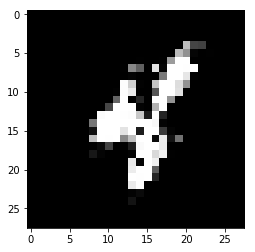

In [75]:
plt.imshow(test_gen.reshape(28,28),'gray')